# DSCI 525 - Web and Cloud Computing

Milestone 2: Your team is planning to migrate to the cloud. AWS gave 400$ (100$ each) to your team to support this. As part of this initiative, your team needs to set up a server in the cloud, a collaborative environment for your team, and later move your data to the cloud. After that, your team can wrangle the data in preparation for machine learning.

## Milestone 2 checklist  
You will have mainly 2 tasks. Here is the checklist...
- To set up a collaborative environment 
    - Setup your EC2 instance with JupyterHub.
    - Install all necessary things needed in your UNIX server (amazon ec2 instance).
    - Set up your S3 bucket.
    - Move the data that you wrangled in your last milestone to s3.
    - To move data from s3.
- Wrangle the data in preparation for machine learning
    - Get the data from S3 in your notebook and make data ready for machine learning.

**Keep in mind:**

- _All services you use are in region us-west-2._

- _Don't store anything in these servers or storage that represents your identity as a student (like your student ID number) ._

- _Use only default VPC and subnet._
    
- _No IP addresses are visible when you provide the screenshot._

- _You do proper budgeting so that you don't run out of credits._ 

- _We want one single notebook for grading, and it's up to your discretion on how you do it. ***So only one person in your group needs to spin up a big instance and a ```t2.xlarge``` is of decent size.***_

- _Please stop the instance when not in use. This can save you some bucks, but it's again up to you and how you budget your money. Maybe stop it if you or your team won't use it for the next 5 hours?

- _Your AWS lab will shut down after 3 hours 30 min. When you start it again, your AWS credentials (***access key***,***secret***, and ***session token***) will change, and you want to update your credentials file with the new one. _

- _Say something went wrong and you want to spin up another EC2 instance, then make sure you terminate the previous one._

- _We will be choosing the storage to be ```Delete on Termination```, which means that stored data in your instance will be lost upon termination. Make sure you save any data to S3 and download the notebooks to your laptop so that next time you have your jupyterHub in a different instance, you can upload your notebook there._

_***Outside of Milestone:*** If you are working as an individual just to practice setting up EC2 instances, make sure you select ```t2.large``` instance (not anything bigger than that as it can cost you money). I strongly recommend you spin up your own instance and experiment with the s3 bucket in doing something (there are many things that we learned and practical work from additional instructions and video series) to get comfortable with AWS. But we won't be looking at it for a grading purpose._

***NOTE:*** Everything you want for this notebook is discussed in lecture 3, lecture 4, and setup instructions.

### 1. Setup your EC2 instance

rubric={correctness:20}

#### Please attach this screen shots from your group for grading.
https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone2/image/1_result.png

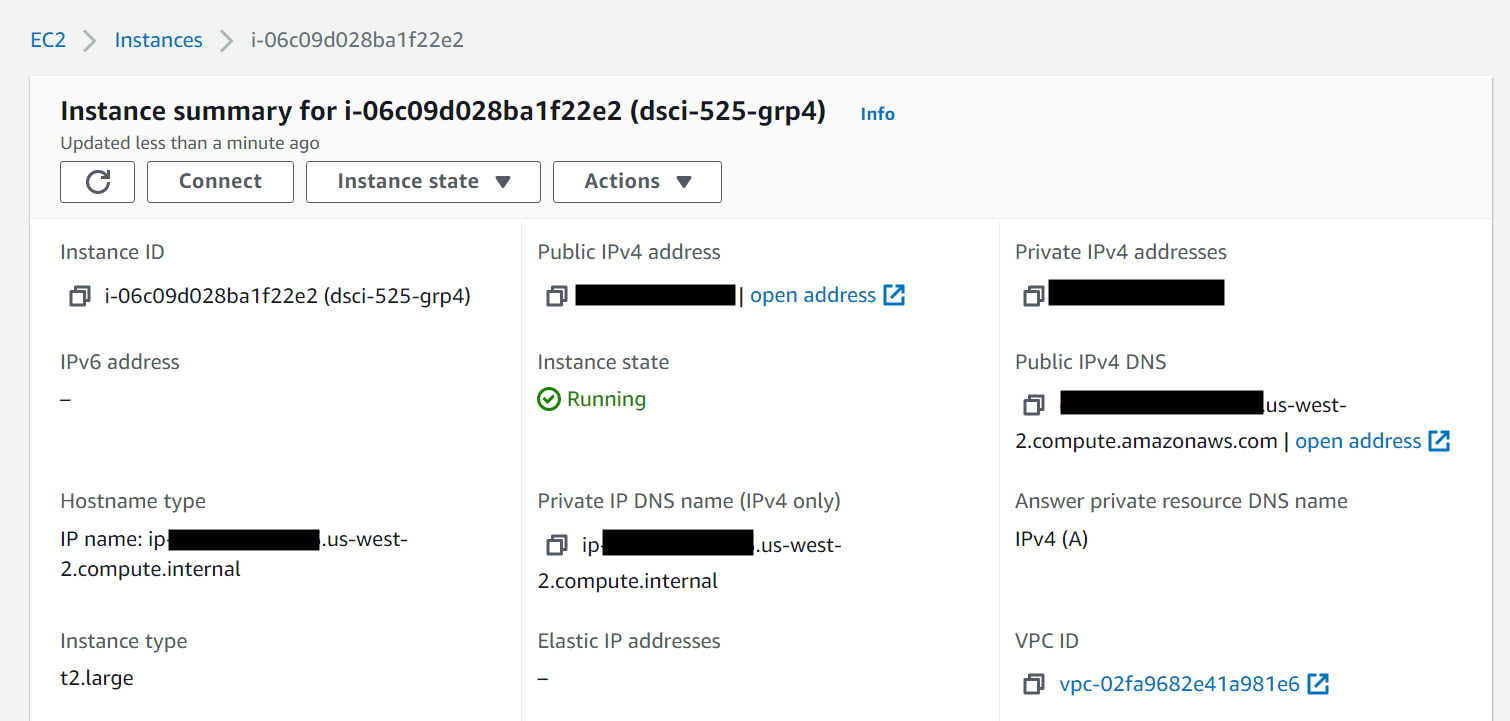

### 2. Setup your JupyterHub

rubric={correctness:20}

#### Please attach this screen shots from your group for grading
I want to see all the group members here in this screenshot https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone2/image/2_result.png

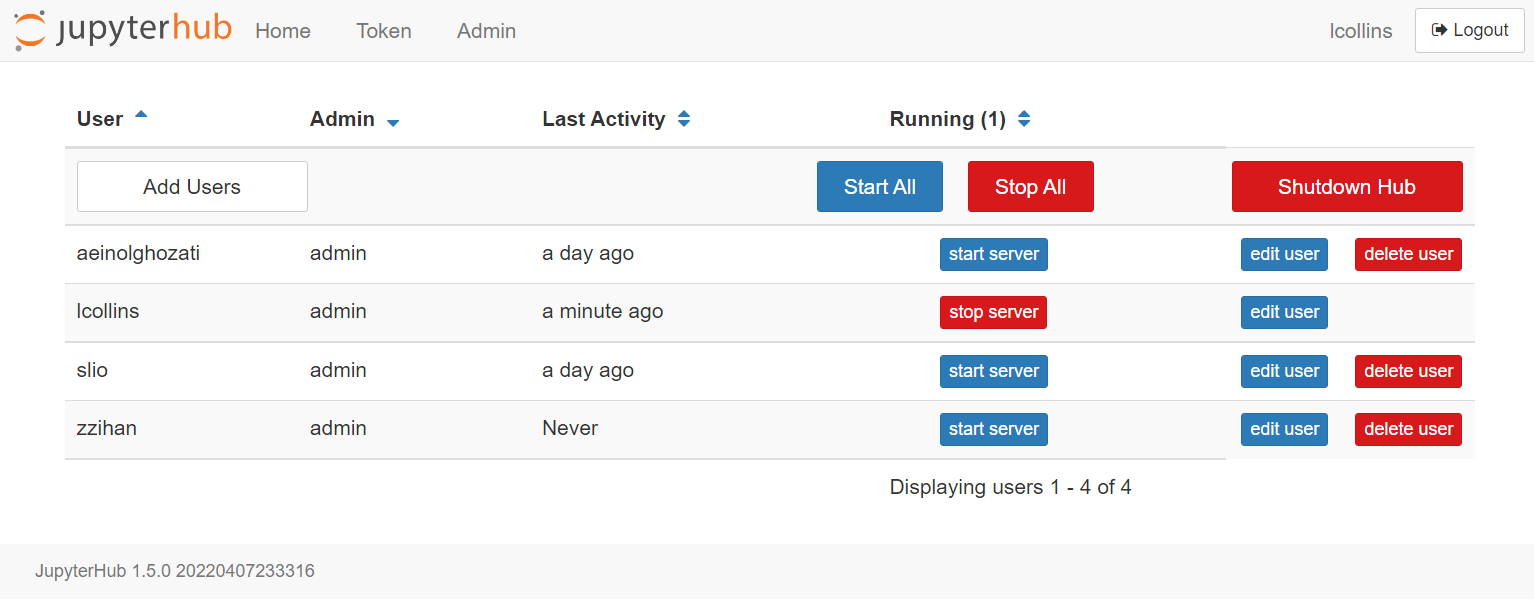

### 3. Setup the server 

rubric={correctness:20}

3.1) Add your team members to EC2 instance.

3.2) Setup a common data folder to download data, and this folder should be accessible by all users in the JupyterHub.
    
3.3)(***OPTIONAL***) Setup a sharing notebook environment.

3.4) Install and configure AWS CLI.

#### Please attach this screen shots from your group for grading

Make sure you mask the IP address refer [here](https://www.anysoftwaretools.com/blur-part-picture-mac/).

https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone2/image/3_result.png

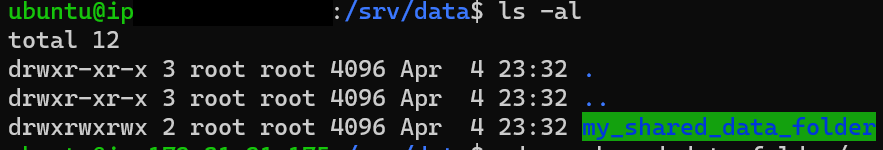

### 4. Get the data what we wrangled in our first milestone. 

You have to install the packages that are needed. Refer this TLJH [document]( https://tljh.jupyter.org/en/latest/howto/env/user-environment.html).Refer ```pip``` section.

Don't forget to add option -E. This way, all packages that you install will be available to other users in your JupyterHub.
These packages you must install and install other packages needed for your wrangling.

    sudo -E pip install pandas
    sudo -E pip install pyarrow
    sudo -E pip install s3fs

As in the last milestone, we looked at getting the data transferred from Python to R, and we have different solutions. Henceforth, I uploaded the parquet file format, which we can use moving forward.

In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

Rememeber here we gave the folder that we created in Step 3.2 as we made it available for all the users in a group.

In [2]:
# Necessary metadata
article_id = 14226968  # this is the unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "/srv/data/my_shared_data_folder/"

In [3]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26844650,
  'name': 'allyears.csv.zip',
  'size': 2405908113,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26844650',
  'supplied_md5': '9e046ac05ecd2c32a256a47dd1098b81',
  'computed_md5': '9e046ac05ecd2c32a256a47dd1098b81'},
 {'id': 26863682,
  'name': 'individual_years.zip',
  'size': 1896206676,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26863682',
  'supplied_md5': '921da748974b07b2a70bbfcc04535a77',
  'computed_md5': '921da748974b07b2a70bbfcc04535a77'},
 {'id': 27515426,
  'name': 'combined_model_data.csv.zip',
  'size': 821308997,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/27515426',
  'supplied_md5': '7638434c44a7d29cbb29fe200b4fd65d',
  'computed_md5': '7638434c44a7d29cbb29fe200b4fd65d'},
 {'id': 27520682,
  'name': 'combined_model_data_parti.parquet.zip',
  'size': 519743915,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/

In [4]:
files_to_dl = ["combined_model_data_parti.parquet.zip"]  ## Please download the partitioned 
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

In [5]:
with zipfile.ZipFile(os.path.join(output_directory, "combined_model_data_parti.parquet.zip"), 'r') as f:
    f.extractall(output_directory)

### 5. Setup your S3 bucket and move data

rubric={correctness:20}

5.1)  Create a bucket name should be mds-s3-xxx. Replace xxx with your "groupnumber".

5.2)  Create your first folder called "output".

5.3) Move the "observed_daily_rainfall_SYD.csv" file from the Milestone1 data folder to your s3 bucket from your local computer.

5.4) Moving the parquet file we downloaded(combined_model_data_parti.parquet) in step 4 to S3 using the cli what we installed in step 3.4.

#### Please attach this screen shots from your group for grading

Make sure it has 3 objects.

https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone2/image/4_result.png

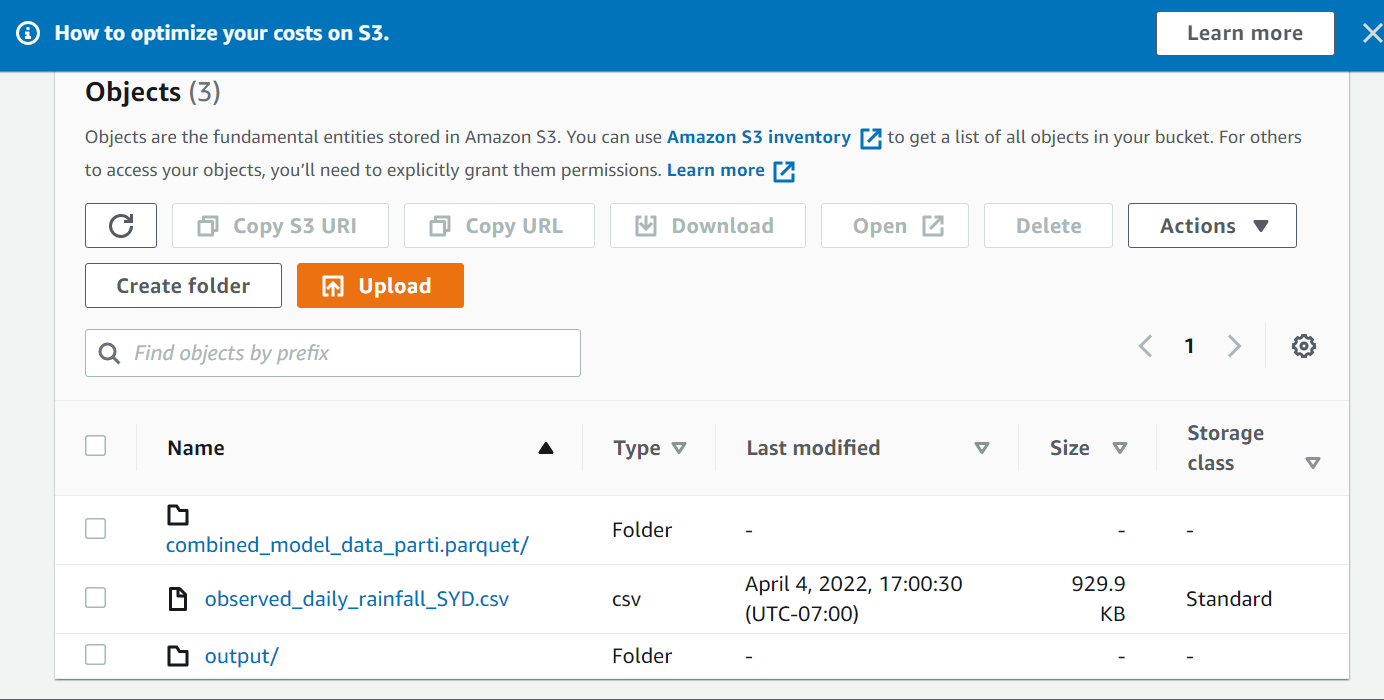

### 6. Wrangle the data in preparation for machine learning

rubric={correctness:20}

Our data currently covers all of NSW, but say that our client wants us to create a machine learning model to predict rainfall over Sydney only. There's a bit of wrangling that needs to be done for that:
1. We need to query our data for only the rows that contain information covering Sydney
2. We need to wrangle our data into a format suitable for training a machine learning model. That will require pivoting, resampling, grouping, etc.

To train an ML algorithm we need it to look like this:

||model-1_rainfall|model-2_rainfall|model-3_rainfall|...|observed_rainfall|
|---|---|---|---|---|---|
|0|0.12|0.43|0.35|...|0.31|
|1|1.22|0.91|1.68|...|1.34|
|2|0.68|0.29|0.41|...|0.57|

6.1) Get the data from s3 (```combined_model_data_parti.parquet``` and ```observed_daily_rainfall_SYD.csv```)

6.2) First query for Sydney data and then drop the lat and lon columns (we don't need them).
```
syd_lat = -33.86
syd_lon = 151.21
```
Expected shape ```(1150049, 2)```.

6.3) Save this processed file to s3 for later use:

  Save as a csv file ```ml_data_SYD.csv``` to ```s3://mds-s3-xxx/output/```
  expected shape ```(46020,26)``` - This includes all the models as columns and also adding additional column ```Observed``` loaded from ```observed_daily_rainfall_SYD.csv``` from s3.

In [6]:
### Do all your coding here

In [7]:
import json
import urllib.parse
import pandas as pd 

df = pd.read_parquet('s3://mds-s3-group4/combined_model_data_parti.parquet')
syd = pd.read_csv('s3://mds-s3-group4/observed_daily_rainfall_SYD.csv')

In [8]:
# Return the date property and set as index
syd["time"] = pd.to_datetime(syd["time"]).dt.date
syd = syd.set_index("time")
syd.head()

,rain (mm/day)
time,
1889-01-01,0.006612
1889-01-02,0.090422
1889-01-03,1.401452
1889-01-04,14.869798
1889-01-05,0.467628


In [9]:
# Shape of Sydney data
syd.shape

(46020, 1)

In [10]:
# Query for sydney data and dropping unnecessary columns
df_sydney = df.query("lat_min <= -33.86 & lat_max >= -33.86 & lon_min <= 151.21 & lon_max >= 151.21")
df_sydney = df_sydney.drop(columns = ["lat_min", "lat_max", "lon_min", "lon_max"])
df_sydney["time"] = df_sydney["time"].dt.date
df_sydney.head()

,time,rain (mm/day),model
552240,1889-01-01,0.040427,ACCESS-CM2
552241,1889-01-02,0.073777,ACCESS-CM2
552242,1889-01-03,0.232656,ACCESS-CM2
552243,1889-01-04,0.911319,ACCESS-CM2
552244,1889-01-05,0.698013,ACCESS-CM2


In [11]:
# Shape of queried data
df_sydney.shape

(1150049, 3)

In [12]:
# Pivoting into desired data format
data = df_sydney.pivot(
    index = "time",
    columns = "model",
    values = "rain (mm/day)"
)

# Add observed data
data["Observed"] = syd["rain (mm/day)"]
data

model,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


In [13]:
# Shape of final wrangled data
data.shape

(46020, 26)

In [14]:
data.to_csv("s3://mds-s3-group4/output/ml_data_SYD.csv")

To make sure the data has been successfully uploaded to the S3, bucket we load the data below.

In [15]:
pd.read_csv("s3://mds-s3-group4/output/ml_data_SYD.csv", index_col = 0)

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,0.037472
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,0.158061
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,0.025719


How the final file format looks like
https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone2/image/finaloutput.png

Shape ```(46020,26 )```

(***OPTIONAL***) If you are interested in doing some benchmarking!! How much time it took to read..
- Parquet file from your local disk ?
- Parquet file from s3 ?
- CSV file from s3 ?
    For that, upload the CSV file (```combined_model_data.csv```
     )to S3 and try to read it instead of parquet. 